# Pulling it all together
- Use the techniques you’ve learned on Gapminder data
- Clean and tidy data saved to a file
    - Ready to be loaded for analysis!
- Dataset consists of life expectancy by country and year
- Data will come in multiple parts
    - Load
    - Preliminary quality diagnosis
    - Combine into single dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Exploratory analysis
Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century has been loaded into a DataFrame called `g1800s`. In the IPython Shell, use pandas methods such as `.head()`, `.info()`, and `.describe()`, and DataFrame attributes like `.columns` and `.shape` to explore it.

Use the information that you acquire from your exploratory analysis to choose the true statement from the options provided below.

In [2]:
gapminder = pd.read_csv('../_datasets/gapminder.csv', encoding = 'unicode_escape' )

# rearranging Life expectancy column at first place
cols = ['Life expectancy']  + [col for col in gapminder if col != 'Life expectancy']
gapminder = gapminder[cols]

gapminder.head()

,Life expectancy,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Cols 1800s
cols1800s = ['Life expectancy']  + [col for col in gapminder if (col >= '1800' and col <= '1899')]
cols1800s

# Building DataFrame g1800s
g1800s = gapminder[cols1800s][:260]
g1800s.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [4]:
print(g1800s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 204.2+ KB
None


In [5]:
print(g1800s.shape)

(260, 101)


In [6]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


### Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame `g1800s` has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in `'1800'` on the x-axis and life expectancy in `'1899'` on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. **If points fall on a diagonal line, it means that life expectancy remained the same!**

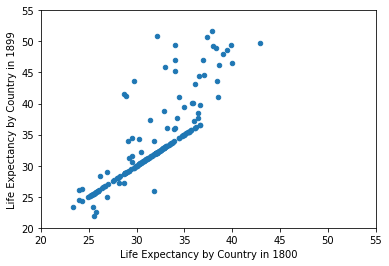

In [7]:
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

### Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

- `'Life expectancy'` is the first column (index `0`) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
- There is only one instance of each country.
- You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [8]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [9]:
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

In [10]:
# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [11]:
# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

### Assembling your data
Here, three DataFrames have been pre-loaded: `g1800s`, `g1900s`, and `g2000s`. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called `gapminder`. This is a row-wise concatenation, similar to how you concatenated the monthly Uber datasets in Chapter 3.

In [12]:
# Cols 1900s and 2000s
cols1900s = ['Life expectancy']  + [col for col in gapminder if (col >= '1900' and col <= '1999')]
cols2000s = ['Life expectancy']  + [col for col in gapminder if (col >= '2000' and col <= '2999')]

# Building DataFrame g1900s and 2000s
g1900s = gapminder[cols1900s][:260]
g2000s = gapminder[cols2000s][:260]

print(g1900s.shape)
print(g2000s.shape)

(260, 101)
(260, 18)


In [13]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s,g1900s,g2000s], axis=1)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
gapminder.head()

(260, 220)


,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial impressions of the data
## Principles of tidy data
- Rows form observations
- Columns form variables
- Tidying data will make data cleaning easier
- Melting turns columns into rows
- Pivot will take unique values from a column and create new columns

### Reshaping your data
Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a *tidy* data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [14]:
gapminder = pd.read_csv('../_datasets/gapminder.csv', encoding = 'unicode_escape', index_col=0)

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars=['Life expectancy'])

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


### Checking the data types
Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that `country` is of type object, `year` is of type int64, and `life_expectancy` is of type float64.

The tidy DataFrame has been pre-loaded as `gapminder`. Explore it in the IPython Shell using the `.info()` method. Notice that the column `'year'` is of type object. This is incorrect, so you'll need to use the `pd.to_numeric()` function to convert it to a numeric data type.

In [15]:
gapminder = gapminder_melt
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [16]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

### Looking at country spellings
Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the `'country'` column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

- The set of lower and upper case letters.
- Whitespace between words.
- Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - `str.contains()` - which takes a regular expression pattern, and applies it to the Series, returning `True` if there is a match, and `False` otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using `~`. This Boolean series can then be used to get the Series of countries that have invalid names.

In [17]:
# Create the series of countries: countries
countries = gapminder.country

countries.value_counts().head()

St. Helena    651
Armenia       651
Paraguay      651
Guadeloupe    651
Uruguay       651
Name: country, dtype: int64

In [18]:
# Drop all the duplicates from countries
countries = countries.drop_duplicates()

countries.value_counts().head()

Papua New Guinea    1
Brazil              1
Botswana            1
Chile               1
Anguilla            1
Name: country, dtype: int64

Write a regular expression that tests your assumptions of what characters belong in `countries`:
- Anchor the pattern to match exactly what you want by placing a `^` in the beginning and `$` in the end.
- Use `A-Za-z` to match the set of lower and upper case letters, `\.` to match periods, and `\s` to match whitespace between words.

In [19]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Use str.contains() to create a Boolean vector representing values that match the pattern.
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187            St. BarthÃ©lemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                     Ã
land
Name: country, dtype: object

As you can see, not all these country names are actually invalid so maybe the assumptions need to be tweaked a little. However, there certainly are a few cases worth further investigation, such as `St. Barth?lemy`. Whenever you are dealing with columns of raw data consisting of strings, it is important to check them for consistency like this.

### More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as [imputation][1]), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See [pandas Foundations][2] for more on forward fill and backward fill.

In general, *it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information*. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have `NaN` in the `life_expectancy` column. Before doing so, it would be valuable to use assert statements to confirm that `year` and `country` do not have any missing values.

Begin by printing the shape of `gapminder` in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

[1]:https://en.wikipedia.org/wiki/Imputation_(statistics)
[2]:https://www.datacamp.com/courses/pandas-foundations

In [20]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

In [21]:
# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

Drop the rows in the data where any observation in `life_expectancy` is missing. As you confirmed that `country` and `year` don't have missing values, you can use the `.dropna()` method on the entire `gapminder` DataFrame, because any missing values would have to be in the `life_expectancy` column. The `.dropna()` method has the default keyword arguments `axis=0` and `how='any'`, which specify that rows with any missing values should be dropped.

In [22]:
# Print the shape of gapminder
print(gapminder.shape)

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)

(169260, 3)
(43857, 3)


After dropping the missing values from `'life_expectancy'`, the number of rows in the DataFrame has gone down from `169260` to `43857`. In general, **you should avoid dropping too much of your data**, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

### Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the `life_expectancy` column. You should not get any values under `0` and you should see something reasonable on the higher end of the `life_expectancy` age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the `life_expectancy` column from each subset, and take an average of the values. You can achieve this using the `.groupby()` method. This [.groupby() method][1] is covered in greater depth in [Manipulating DataFrames with pandas][2].

Finally, you can save your tidy and summarized DataFrame to a file using the `.to_csv()` method.

[1]:http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
[2]:https://www.datacamp.com/courses/manipulating-dataframes-with-pandas

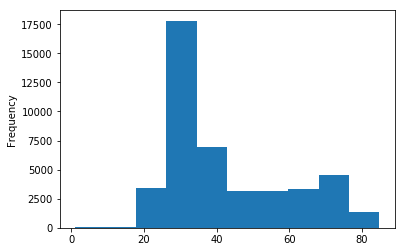

In [23]:
# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

In [24]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [25]:
# Print the tail of gapminder_agg
print(gapminder_agg.tail())

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


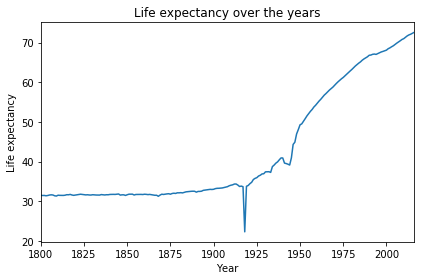

In [26]:
# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [27]:
# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv', header=True)
gapminder_agg.to_csv('gapminder_agg.csv', header=True)

# You’ve learned how to…
- Load and view data in pandas
- Visually inspect data for errors and potential problems
- Tidy data for analysis and reshape it
- Combine datasets
- Clean data by using regular expressions and functions
- Test your data and be proactive in finding potential errors